# Gyakori elemhalmazok előállítása



----


A gyakori elemhalmazok keresése elvileg az elemhalmazháló bejárásaként is tekinthető. A bejárás komplexitása exponenciális.

## Apriori-elv


Ha egy elemhalmaz gyakori, akkor ezen elemhalmaz összes részhalmaza is gyakori.
Az apriori-elv alkalmazásával a részhalmazok exponenciális keresési tere csökkenthető. 

## Apriori algoritmus


A laborgyakorlatban az apriori algoritmus Python [implmentációját](https://pypi.org/project/apyori/) próbáljuk ki. 

Az Apriori algoritmus a legismertebb gyakori elemhalmaz keresésére alkalmas módszer. Szélességi bejárást valósít meg: az üres halmazból kiindulva szintenként halad előre a nagyobb méretű gyakori elemhalmazok meghatározásához. Minden iterációban az eggyel nagyobb méretű elemhalmazokkal foglalkozik, így az iterációk száma legfeljebb eggyel több, mint a legnagyobb gyakori elemhalmaz mérete.

In [1]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5976 sha256=90f5ae236b4db348caad0cdb11afcaa16e19364b534e5ea736a6ef3bf73425bc
  Stored in directory: /root/.cache/pip/wheels/32/2a/54/10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [2]:
from google.colab import files
files.upload()

{}

Importáljuk a könyvtárakat (az apriori az apyori-ból is). 

In [3]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from apyori import apriori 

Olvassuk be a *store_data_apriori.csv* állományt.

In [4]:
store_data = pd.read_csv('./store_data_apriori.csv') 

Hány tranzakciót tartalmaz a fájl?

In [5]:
len(store_data)

7500

Melyik a leghosszabb tranzakció (hány elemű)?

In [6]:
store_data.count(axis = 1).max()

19

Mi az átlag tranzakció hossza (általában hány terméket vásárolnak)?

In [7]:
store_data.count(axis = 1).mean()

3.9124

Hány különböző termék került eladásra?

In [8]:
store_data.head()
len(set(np.concatenate(store_data.values)))-1

7620

Hány különböző termék került eladásra?

In [10]:
store_data.head()
termek_lista = set(np.concatenate(store_data.values))
termek_lista = [termek for termek in termek_lista if str(termek) != 'nan']
len(termek_lista)

120

Melyik terméket hányszor adták el?

In [11]:
termek_eladasok = []
term = np.concatenate(store_data.values)
for termek in termek_lista:
  count = 0
  for vasarlas in term:
    if termek == vasarlas:
      count+=1;
  print(termek,count)
  termek_eladasok.append([termek,count])
df = pd.DataFrame(termek_eladasok,columns=['etel', 'darab'])

french wine 169
cauliflower 36
grated cheese 393
antioxydant juice 66
light cream 117
mint 131
spaghetti 1306
magazines 82
tomato sauce 106
frozen smoothie 474
water spray 3
mayonnaise 46
cider 79
escalope 595
chocolate bread 32
vegetables mix 192
cake 608
fresh bread 323
parmesan cheese 149
flax seed 68
cottage cheese 238
bug spray 65
turkey 469
milk 972
cereals 193
yogurt cake 205
white wine 124
whole wheat rice 439
extra dark chocolate 90
yams 85
muffins 181
bacon 65
soda 47
bramble 14
sandwich 34
mint green tea 42
salmon 318
shallot 58
pancakes 713
nonfat milk 78
salt 69
energy bar 203
pepper 199
almonds 152
asparagus 35
mushroom cream sauce 143
cream 7
sparkling water 47
red wine 211
energy drink 199
frozen vegetables 715
cookies 603
napkins 5
whole weat flour 69
pasta 118
fromage blanc 102
tomatoes 513
champagne 351
strawberries 160
black tea 107
chili 46
gluten free bar 52
green grapes 67
soup 379
green beans 65
olive oil 493
hot dogs 243
light mayo 204
rice 141
zucchini 71
babi

Átlagban egy terméket hányszor adtak el?

In [12]:
df['napi_atlag'] = df['darab']/7
df

,etel,darab,napi_atlag
0,french wine,169,24.142857
1,cauliflower,36,5.142857
2,grated cheese,393,56.142857
3,antioxydant juice,66,9.428571
4,light cream,117,16.714286
...,...,...,...
115,clothes accessories,63,9.000000
116,chocolate,1230,175.714286
117,whole wheat pasta,221,31.571429
118,ketchup,33,4.714286


Ábrázoljuk a termékeladások eloszlását (hisztogram).

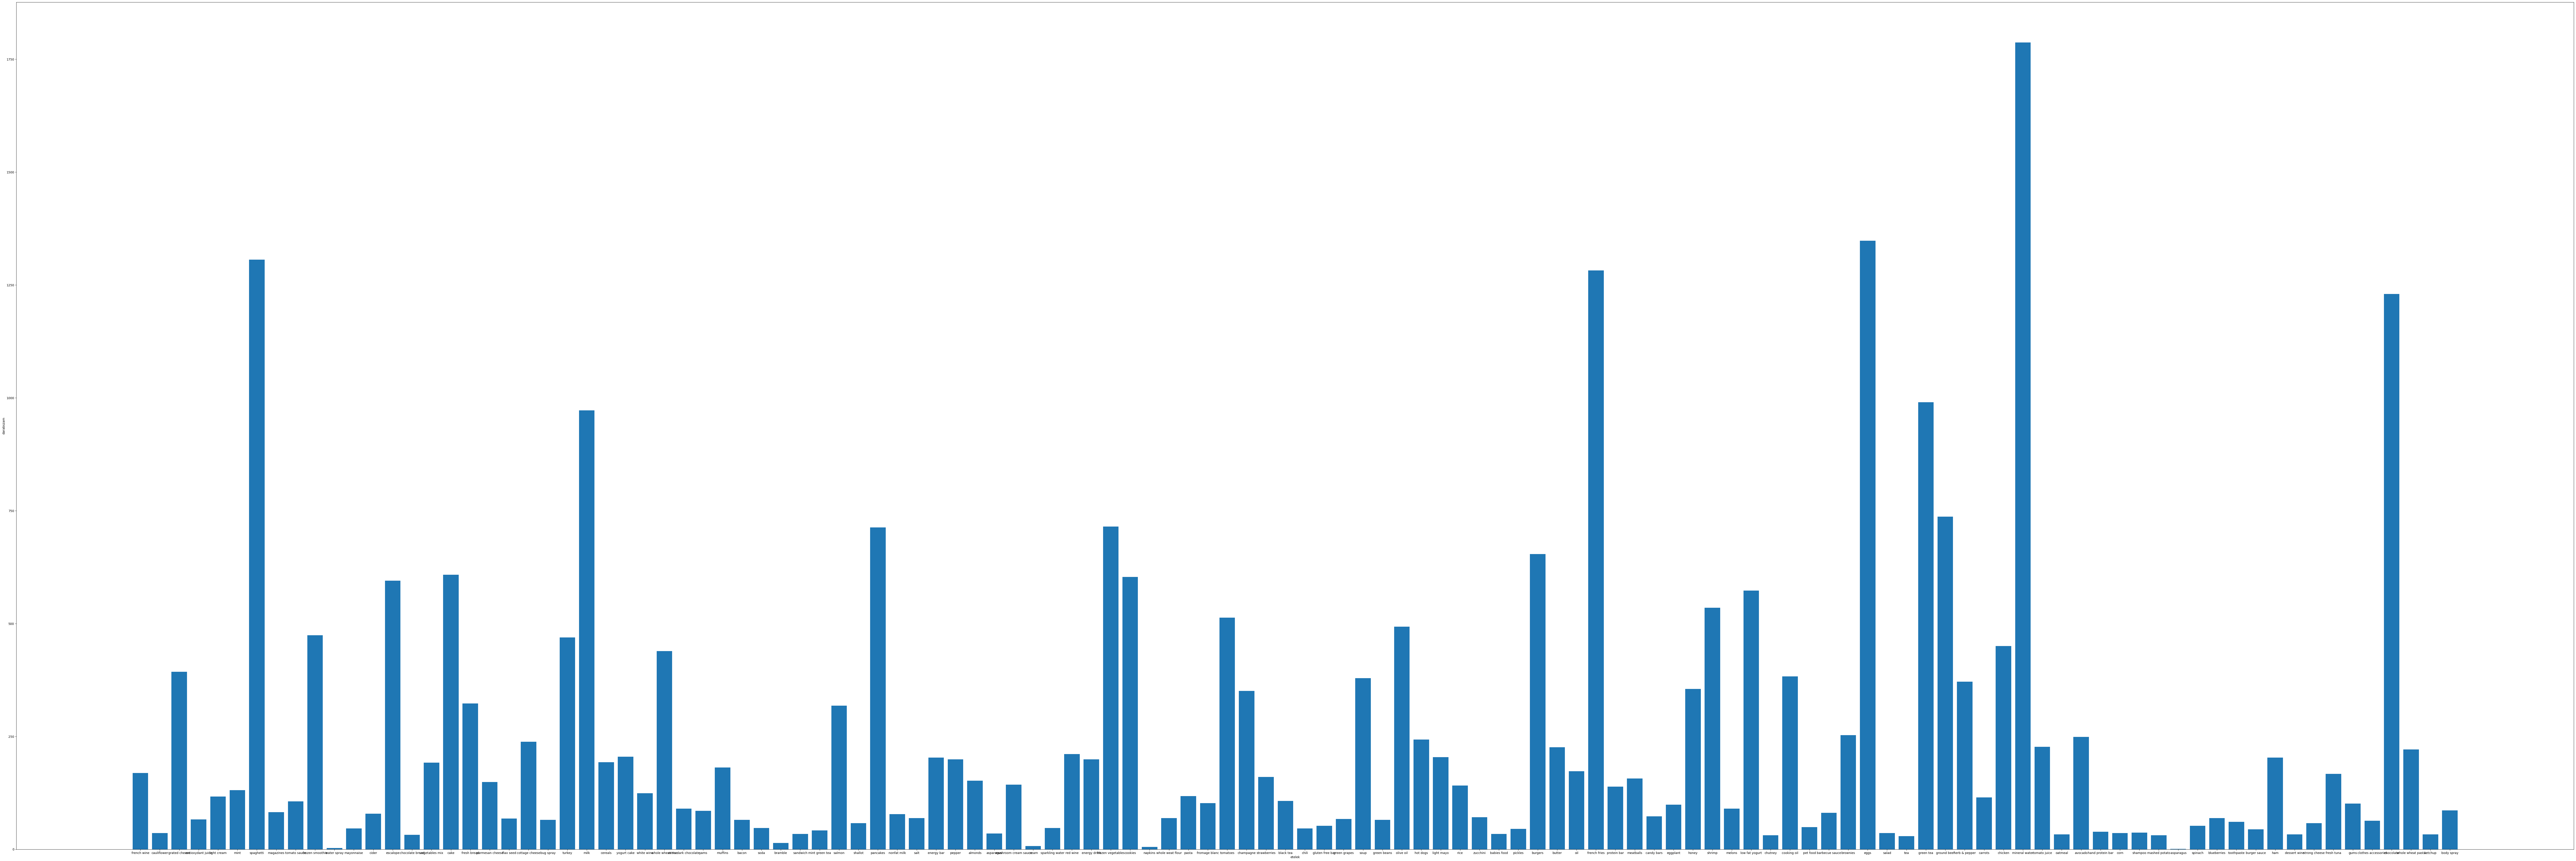

In [13]:
plt.figure(figsize=(150,50))
plt.plot()
plt.bar(df['etel'],df['darab'])
plt.ylabel('darabszam')
plt.xlabel('etelek')
plt.show()

Az  apriori algoritmus bemenete egy  listákat tartalamazó lista. Alakítsuk át a dataframet "list of lists"-re.

In [14]:
records = []  
for i in range(0,len(store_data)):
  records.append([str(store_data.values[i,j]) for j in range(0,20)])

In [15]:
print(records)

[['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['whole wheat pasta', 'french fries', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['soup', 'light cream', 'shallot', 'nan', 'nan', 'nan'

Válasszuk meg a `min_support`, `min_confidence`, `min_lift`, `min_length` paramétereket és számoljuk ki a gyakori  elemhalmazokat. 

In [16]:
association_rules = apriori(records, min_support = 0.0056, min_confidence = 0.2, min_lift = 3, min_length = 3)
association_results = list(association_rules)
print(association_results[0])

RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)])


Hogyan változik az elemhalmazok száma a `min_support`, `min_confidence`, `min_lift`, `min_length` paraméterek változtatásával? 

In [17]:
association_rules = apriori(records, min_support = 0.004, min_confidence = 0.2, min_lift = 3, min_length = 3)
association_results = list(association_rules)
print(association_results[0])

association_rules = apriori(records, min_support = 0.004, min_confidence = 0.1, min_lift = 3, min_length = 3)
association_results = list(association_rules)
print(association_results[0])

association_rules = apriori(records, min_support = 0.004, min_confidence = 0.1, min_lift = 2, min_length = 3)
association_results = list(association_rules)
print(association_results[0])

association_rules = apriori(records, min_support = 0.004, min_confidence = 0.1, min_lift = 2, min_length = 2)
association_results = list(association_rules)
print(association_results[0])

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)])
RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)])
RelationRecord(items=frozenset({'burgers', 'almonds'}), support=0.0052, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.2565789473684211, lift=2.9424191211974895)])
RelationRecord(items=frozenset({'burgers', 'almonds'}), support=0.0052, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.2565789473684211, lift=2.9424191211974895)])
